In [1]:
clean_up = True # if True, remove all gams related files from working folder before starting
%run stdPackages.ipynb
os.chdir(main)
%run stdPlotting.ipynb

# Run GAMS from Python

Initialize a gams workspace to run GAMS from Python:

In [12]:
ws = GpyDB.initWs(d['work'])

Move relevant files and databases to the working folder (this creates copies):

In [17]:
gms = os.path.join(d['gams'], 'P.gms') # name of gms file
gmy = os.path.join(d['gams'], 'P.gmy') # name of gmy file
gdx = os.path.join(d['data'], 'P.gdx') # name of database file
[shutil.copy(f, os.path.join(d['work'], os.path.basename(f))) for f in (gms,gmy,gdx)]; # create copies in work folder

Create ```GamsJob``` from file and run:

In [26]:
job = ws.add_job_from_file(os.path.join(d['work'], os.path.basename(gms)))
job.run() # run model

We can extract solution now as:

In [28]:
soldb = GpyDB(job.out_db, ws = ws)

Visualize:

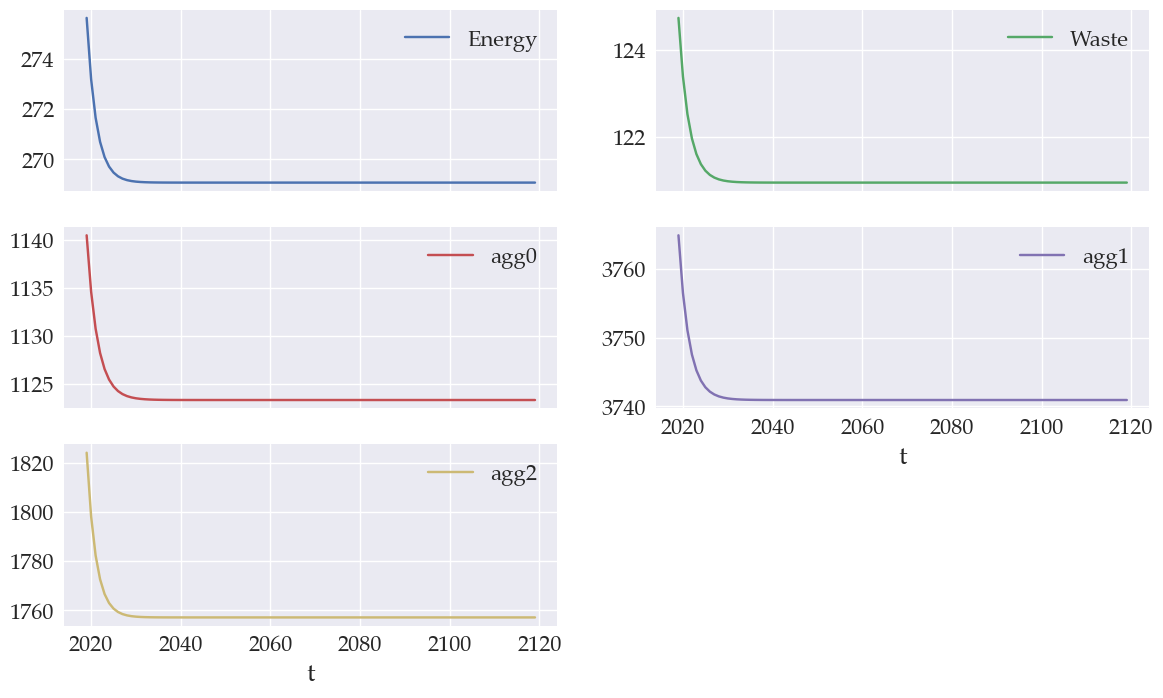

In [32]:
mult_graphs();
soldb('qD').xs('K',level= 'n').unstack('s').plot(subplots=True, layout = (3,2), figsize = (14,8));

We can also use the gamY code and run using a precompiler instance:

In [40]:
job = ws.add_job_from_string(Precompiler()(file_path = os.path.join(d['work'], os.path.basename(gmy))))
job.run() # run model